<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#随机森林" data-toc-modified-id="随机森林-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>随机森林</a></span></li><li><span><a href="#使用-GridSearchCVC-工具" data-toc-modified-id="使用-GridSearchCVC-工具-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>使用 GridSearchCVC 工具</a></span></li><li><span><a href="#使用-Pipeline-管道机制进行流水线作业" data-toc-modified-id="使用-Pipeline-管道机制进行流水线作业-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>使用 Pipeline 管道机制进行流水线作业</a></span></li><li><span><a href="#分析信用卡违约率" data-toc-modified-id="分析信用卡违约率-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>分析信用卡违约率</a></span><ul class="toc-item"><li><span><a href="#项目流程" data-toc-modified-id="项目流程-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>项目流程</a></span></li></ul></li><li><span><a href="#总结" data-toc-modified-id="总结-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>总结</a></span></li><li><span><a href="#练习" data-toc-modified-id="练习-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>练习</a></span></li></ul></div>

1. 创建各种分类器；
1. 掌握 GridSearchCVC 工具，优化算法模型的参数；
1. 使用 PipeSearch 管道机制进行流水线作业。

## 随机森林

随机森林，Random Forest，RF。实际上是一个包含多个决策树的分类器，每一个分类器都是一颗 CART 分类回归树。因此，随机森林既可以做分类，也可以做回归。
<br>
做分类时，输出结果是每个子分类器的分类结果中最多的那个。
<br>
做回归时，输出结果是每棵 CART 树的回归结果的平均值。

## 使用 GridSearchCVC 工具

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

rf = RandomForestClassifier()
parameters = {"n_estimators": range(1, 11)}
iris = load_iris()
# print(parameters)
clf = GridSearchCV(estimator=rf, param_grid=parameters)

clf.fit(iris.data, iris.target)
print(" 最优分数：%.4lf" %clf.best_score_)
print(" 最优参数：", clf.best_params_)

 最优分数：0.9667
 最优参数： {'n_estimators': 5}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


疑问：为何执行多次最优分数是一定的 0.9667 但是最优参数，n_estimators 每次都不一样，是什么原因？

**注意：GridSearchCVC 本质是暴力搜索，穷举法，因此不适用于大数据。**

## 使用 Pipeline 管道机制进行流水线作业

Pipeline 管道机制：把每一步按顺序列下来，从而创造 Pipeline 流水线作业。每一步都采用（'名称', '步骤'）的方式来表示。

代码如下：

1. 采用 StandardScaler 方法对数据规范化，即采用数据规范化为均值为 0，方差为 1 的正态分布；
1. 采用 PCA 方法对数据进行降维；
1. 采用随机森林进行分类。


In [ ]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('randomforestclassifier', RandomForestClassifier())
])

***
实例：

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

rf = RandomForestClassifier()
parameters = {"randomforestclassifier__n_estimators": range(1,11)}
iris = load_iris()
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('randomforestclassifier', rf)
])

clf = GridSearchCV(estimator=pipeline, param_grid=parameters)

clf.fit(iris.data, iris.target)
print(" 最优分数：%.4lf" %clf.best_score_)
print(" 最优参数：", clf.best_params_)

## 分析信用卡违约率

信用卡数据：

<img src="https://static001.geekbang.org/resource/image/17/88/1730fb3a809c99950739e7f50e1a6988.jpg" style="width:500px">

### 项目流程

<img src="https://static001.geekbang.org/resource/image/92/a5/929c96584cbc25972f63ef39101c96a5.jpg" style="width:500px">

1. 使用数据可视化探索数据；<br><br>
1. 使用 train_test_split 划分数据集；<br><br>
1. 使用 Pipeline 管道机制，将数据规范化设置为第一步，分类为第二步；<br><br>
1. 由于不知道哪个分类器效果好，因此设置多个分类器，比如 SVM、决策树、随机森林和 KNN；<br><br>
1. 通过 GridSearchCVC 工具，找到每个分类器的最优参数和最优分数；<br><br>
1. 找到最适合这个项目的分类器和该分类器的参数。<br><br>

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


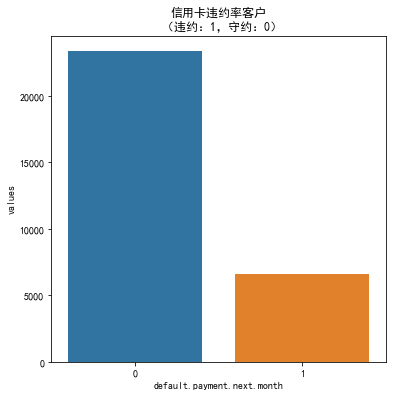

GridSearch 最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch 最优分数： 0.8174
 准确率 0.8172
GridSearch 最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch 最优分数： 0.8186
 准确率 0.8113
GridSearch 最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch 最优分数： 0.7998
 准确率 0.7994
GridSearch 最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch 最优分数： 0.8040
 准确率 0.8036
GridSearch 最优参数： {'adaBoostClassifier__n_estimators': 10}
GridSearch 最优分数： 0.8187
 准确率 0.8129


In [13]:
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv("./datasets/UCI_Credit_Card.csv")

# print(data.shape)
# print(data.describe())

next_month = data['default.payment.next.month'].value_counts()
print(next_month)

# 可视化违约与守约客户数据
df = pd.DataFrame(
    {'default.payment.next.month': next_month.index, 'values': next_month.values})
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.figure(figsize=(6, 6))  # 设置画布大小
plt.title('信用卡违约率客户\n （违约：1，守约：0）')  # 条形图标题
sns.set_color_codes("pastel")  # 设置颜色
sns.barplot(x='default.payment.next.month', y="values", data=df)  # 设置轴的取值
locs, labels = plt.xticks()
plt.show()

# 选择特征
data.drop(['ID'], inplace=True, axis=1)
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values

train_x, test_x, train_y, test_y = train_test_split(
    features, target, test_size=0.30, stratify=target, random_state=1)
# stratify:If not None, data is split in a stratified fashion, using this as the class labels.

# 创建分类器
classifiers = [
    SVC(random_state=1, kernel='rbf'),  # 支持向量机算法，kernel='rbf'，核函数选择高斯核函数
    # 决策树分类算法，criterion='gini'，选择 ID3 算法
    DecisionTreeClassifier(random_state=1, criterion='gini'),
    # 随机森林分类算法，criterion='gini'，选择 ID3 算法
    RandomForestClassifier(random_state=1, criterion='gini'),
    # K 临近分类算法，metric='minkowski'，计算距离的方式为闵可夫斯基距离
    KNeighborsClassifier(metric='minkowski'),
    # AdaBoost 分类算法
    AdaBoostClassifier(random_state=1, algorithm='SAMME.R')
]

# 分类器名字
classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
    'adaBoostClassifier',
]

classifier_param_grid = [
    {'svc__C': [1], 'svc__gamma':[0.01]},  # 惩罚系数为 1，核函数的系数为 0.01，即样本特征数为 100
    {'decisiontreeclassifier__max_depth': [6, 9, 11]},  # 最大深度的取值
    {'randomforestclassifier__n_estimators': [3, 5, 6]},  # 决策树个数
    {'kneighborsclassifier__n_neighbors': [4, 6, 8]},  # 邻居的数量
    {'adaBoostClassifier__n_estimators': [10, 50, 100]},
]

# 对具体的分类器进行 GridSearchCV 参数调优


def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score='accuracy'):
    respose = {}
    gridsearch = GridSearchCV(
        estimator=pipeline, param_grid=param_grid, scoring=score)
    # estimator，采用的分类器
    # param_grid，优化目标，字典或列表形式
    # scoring，准确度的评价标准，设置为 accuracy

    search = gridsearch.fit(train_x, train_y)  # 拟合
    print("GridSearch 最优参数：", search.best_params_)  # 得到最优参数
    print("GridSearch 最优分数： %0.4lf" % search.best_score_)  # 得到最优分数
    predict_y = gridsearch.predict(test_x)  # 根据 test_x 得到预测值
    print(" 准确率 %0.4lf" % accuracy_score(test_y, predict_y))  # 得到准确率
    respose['predict_y'] = predict_y  # 储存预测值
    respose['accuracy_score'] = accuracy_score(test_y, predict_y)  # 储存准确率
    return respose


# 循环调用各类选择器
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    # 创建 Pipeline 管道机制，使其流水线作业
    pipeline = Pipeline([
        # 采用 ('名称', '步骤') 的方式表示
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    result = GridSearchCV_work(
        pipeline, train_x, train_y, test_x, test_y, model_param_grid, score='accuracy')

## 总结

![](https://static001.geekbang.org/resource/image/14/16/14f9cddc17d6cceb0b8cbc4381c65216.png)

## 练习

尝试编写代码使用 AdaBoost 分类器做分类，其中 n_estimators 的取值有 10、50、100 三种可能，使用 GridSearchCVC 运行看见最优参数是多少，测试准确率是多少。